#Timeseries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/exchange_rate.csv',index_col='date',parse_dates=True)
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 376.6+ KB


<Axes: ylabel='Ex_rate'>

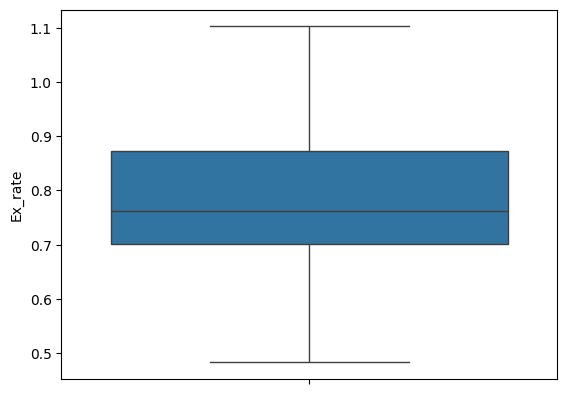

In [8]:
sns.boxplot(df['Ex_rate'])

<ipython-input-9-71f64d7f202c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ex_rate'])


<Axes: xlabel='Ex_rate', ylabel='Density'>

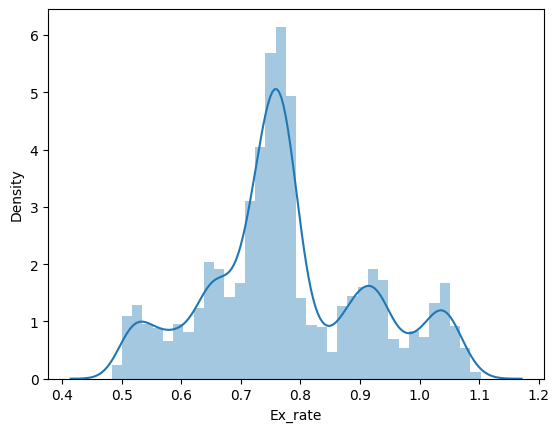

In [9]:
sns.distplot(df['Ex_rate'])

<Axes: xlabel='Ex_rate', ylabel='Count'>

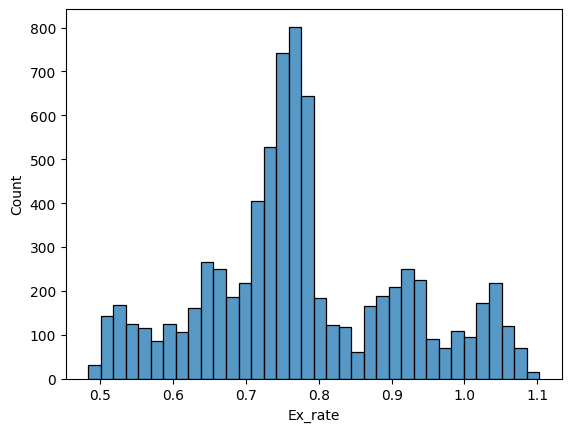

In [10]:
sns.histplot(df['Ex_rate'])

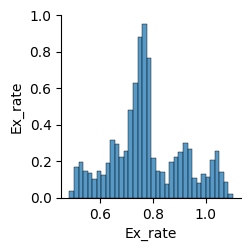

In [11]:
sns.pairplot(df)

<Axes: >

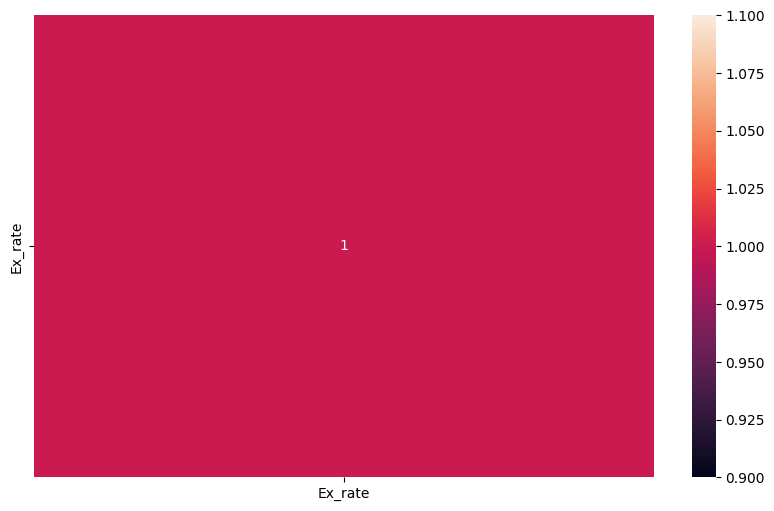

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

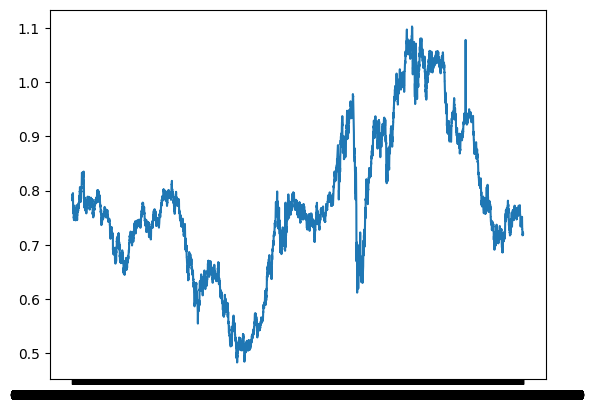

In [13]:
plt.plot(df)

In [15]:
from matplotlib import pyplot
from pandas.plotting import lag_plot

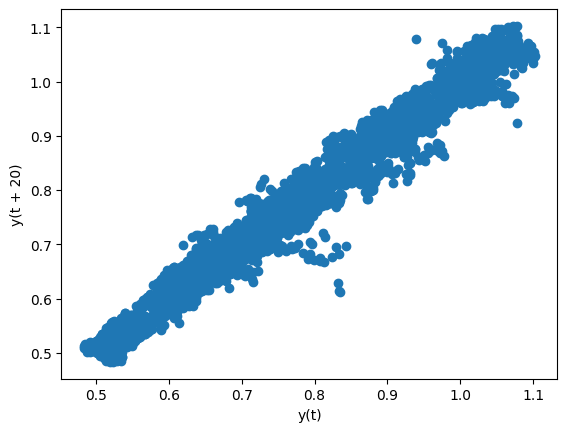

In [16]:
lag_plot(df,lag=20)
pyplot.show()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

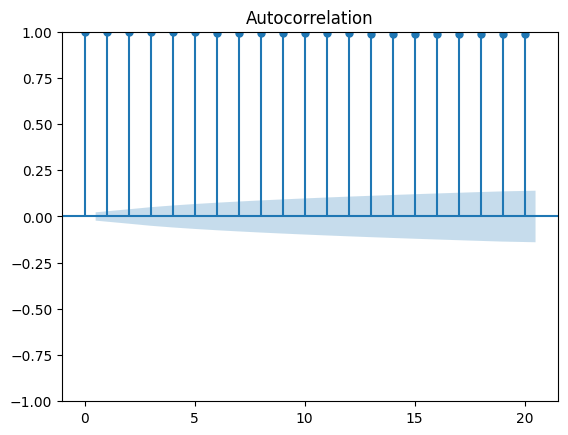

In [18]:
plot_acf(df,lags=20)
pyplot.show()

In [19]:
train = df.head(6000)
test = df.tail(1588)

<Axes: xlabel='date'>

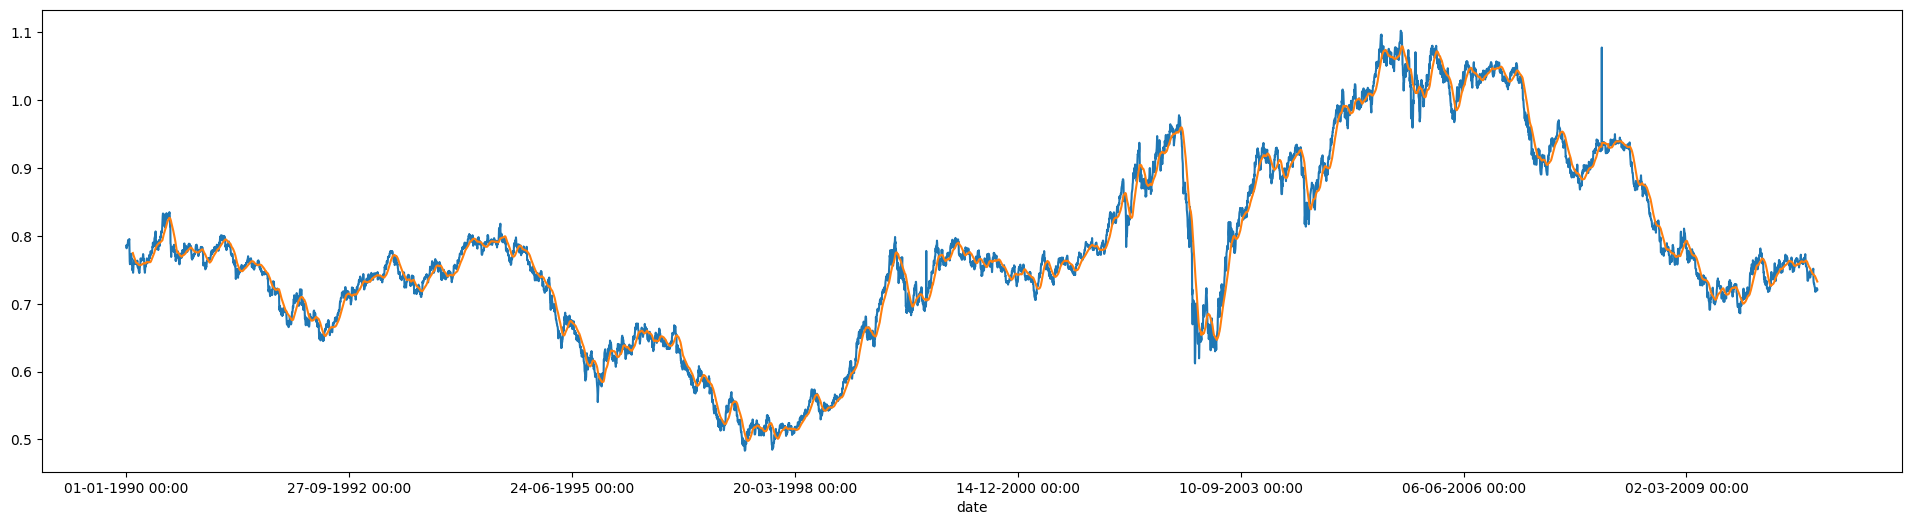

In [22]:
plt.figure(figsize=(24,6))
df.Ex_rate.plot(label='df')

pred = pd.DataFrame()
pred['moving_avg'] = df['Ex_rate'].rolling(30).mean()
pred['moving_avg'].plot(label=str(10))

In [23]:
def MAPE(pred,org):
  df = np.abs((pred-org)/org)*100
  return np.mean(df)

In [24]:
test

,Ex_rate
date,
06-06-2006 00:00,1.037990
07-06-2006 00:00,1.037947
08-06-2006 00:00,1.026694
09-06-2006 00:00,1.022735
10-06-2006 00:00,1.031800
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [26]:
model = SimpleExpSmoothing(df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [27]:
fit = model.fit(smoothing_level=0.2,optimized=False)

In [28]:
df['smoothed'] = fit.fittedvalues

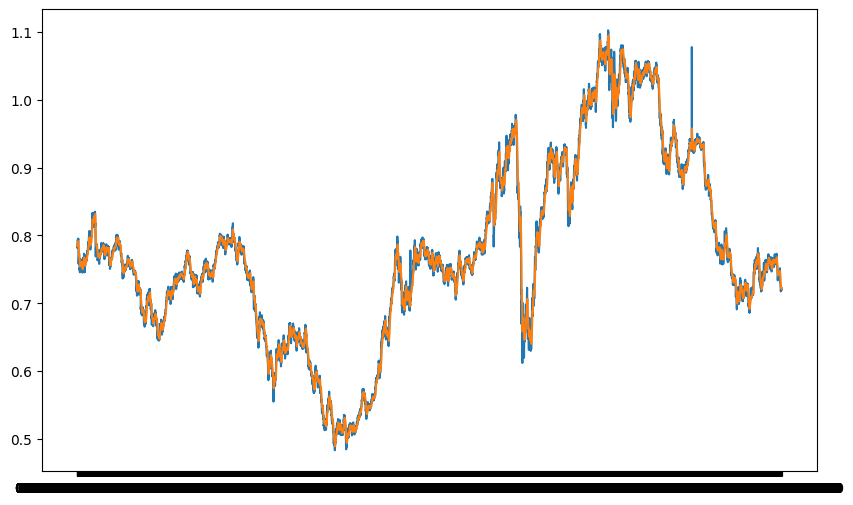

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df['Ex_rate'])
plt.plot(df['smoothed'])